In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn
from cmath import sqrt

## 2.1 Plot $y = -3x^2 + 72x + 70$.

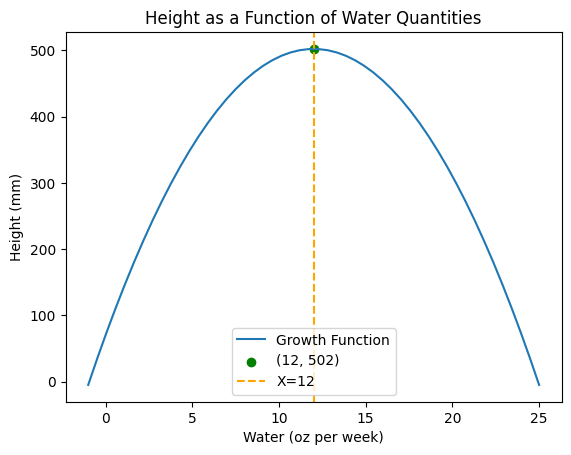

In [2]:
# Your code here
x = np.linspace(-1, 25)
y = ((-3) * x ** 2) + (72 * x) + 70
plt.plot(x, y, label="Growth Function")
plt.scatter(12, 502, color="green", label="(12, 502)")
plt.axvline(12, color="orange", linestyle="dashed", label="X=12")
plt.xlabel("Water (oz per week)")
plt.ylabel("Height (mm)")
plt.title("Height as a Function of Water Quantities")
plt.legend()
plt.show()

## 2.3 Plot $f(x_1, x_2)$.

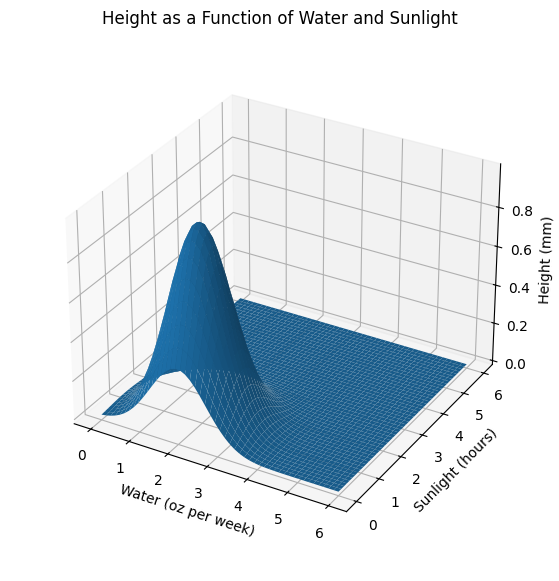

In [3]:
# Your code here

# Create plot and format it
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_figheight(7)
fig.set_figwidth(8)
ax.set_box_aspect(aspect=None, zoom=0.9)

# Create linspace for inputs and create function for height
water = np.linspace(0, 6)
sunlight = np.linspace(0, 6)
water, sunlight = np.meshgrid(water, sunlight)
z = np.exp(-(water - 2)**2-(sunlight - 1)**2)

# Set labels
ax.set_xlabel("Water (oz per week)")
ax.set_ylabel("Sunlight (hours)")
ax.set_zlabel("Height (mm)")
ax.set_title("Height as a Function of Water and Sunlight")


# Plot function
ax.plot_surface(water, sunlight, z)
plt.show()

## 3.1(a) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

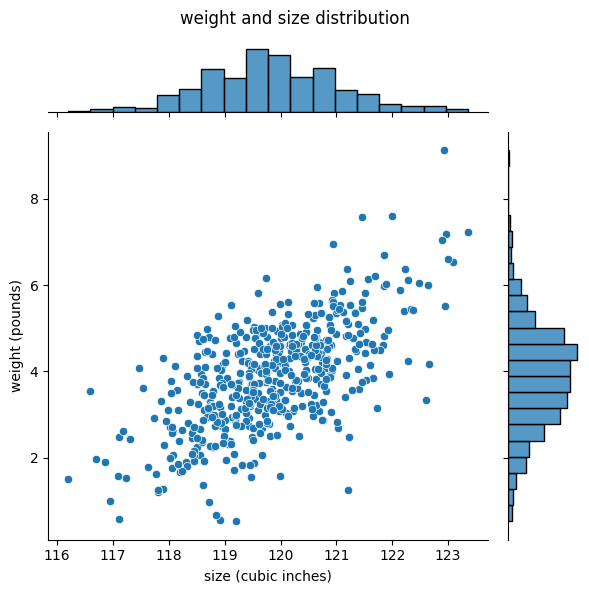

In [4]:
# Your code here

# Package arrival times are distributed with the poisson distribution with lambda = 3
# Package size and weight are distributed normally with vector mean and matrix standard deviation
# Random noise is distributed normally with mean of 0 and STD of 5



# Create multi-variate distribution
mean = [120, 4]
cov = [[1.5, 1], [1, 1.5]]
mult_dist = mvn(mean=mean, cov=cov)

# Sample from distribution
samples = mult_dist.rvs(size=500)

# Plot histogram
df = pd.DataFrame(samples, columns=["size (cubic inches)", "weight (pounds)"])
p = sns.jointplot(x="size (cubic inches)", y="weight (pounds)", data=df)
p.fig.suptitle("weight and size distribution")
p.fig.tight_layout()
plt.show()

# Weight ~ 120
# Size ~ 4

## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

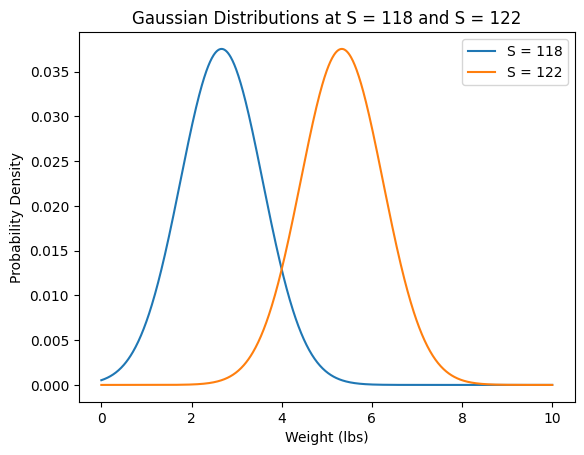

In [5]:
# Create s values for the loop and wVals for plotting
sVals = [118, 122]
wVals = np.linspace(0, 10, 1001)

for sVal in sVals:
    # Array with fixed s value
    x = np.ones(1001) * sVal
    
    # Create array with wVals and x for columns
    x2 = np.vstack([x, wVals]).T
    
    # Generate pdf for fixed s and varrying w
    fw = mult_dist.pdf(x2)
    plt.plot(wVals, fw, label=f"S = {sVal}")
plt.legend()
plt.ylabel("Probability Density")
plt.xlabel("Weight (lbs)")
plt.title("Gaussian Distributions at S = 118 and S = 122")
plt.show()

## 3.5(a) Function to simulate draws from $T^{*}$.

In [6]:
def tStarSim(time: int) -> float:
    # Bound time input between 1 and 24
    time = min(24, max(time, 1))
    
    # Simulate packages per hour
    packages = np.random.poisson(lam=3, size=time)
    
    # Find out the total number of packages by summing over the number of packages per hour
    numPackages = np.sum(packages)
    tStar = 0
    
    # For each package sample from distributions and calculate T to add it to tStar
    for _ in range(numPackages):
        S = np.random.normal(loc=120, scale=1.5)
        W = np.random.normal(loc=4, scale=1.5)
        epsilon = np.random.normal(loc=0, scale=5)
        T = 60 + 0.6 * W + 0.2 * S + epsilon
        tStar += T
    return tStar

tStarSim(24)

5779.09089666657

## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

In [23]:
# Your code here
def runSims(time: int, numSims: int):
    simulations = []
    for _ in range(numSims):
        simulations.append(tStarSim(time))
    return simulations


numSims = 1000
time = 24
simulations = runSims(time, numSims)

mean = np.mean(simulations)
stdev = np.std(simulations)

print("mean: ", mean)
print("standard dev: ", stdev)


mean:  6211.258181459496
standard dev:  728.9554813767766
